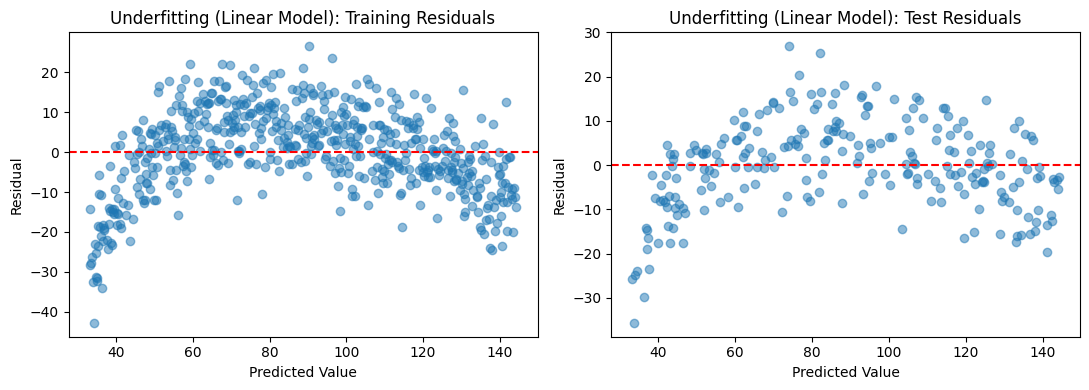

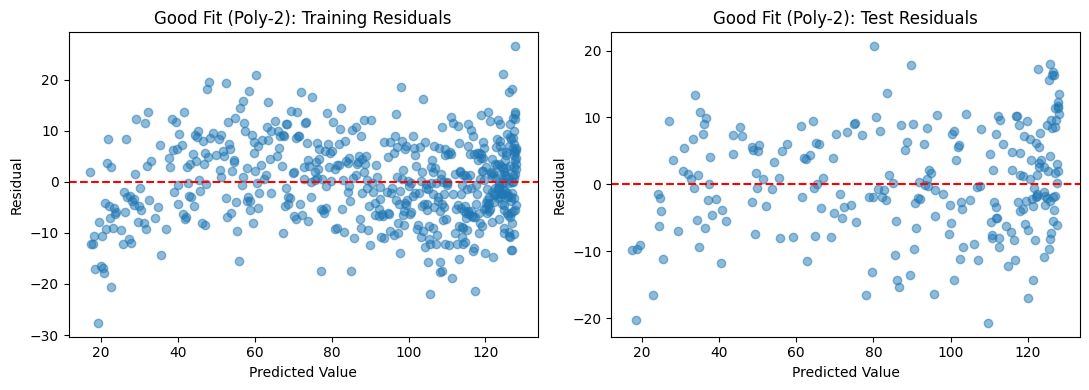

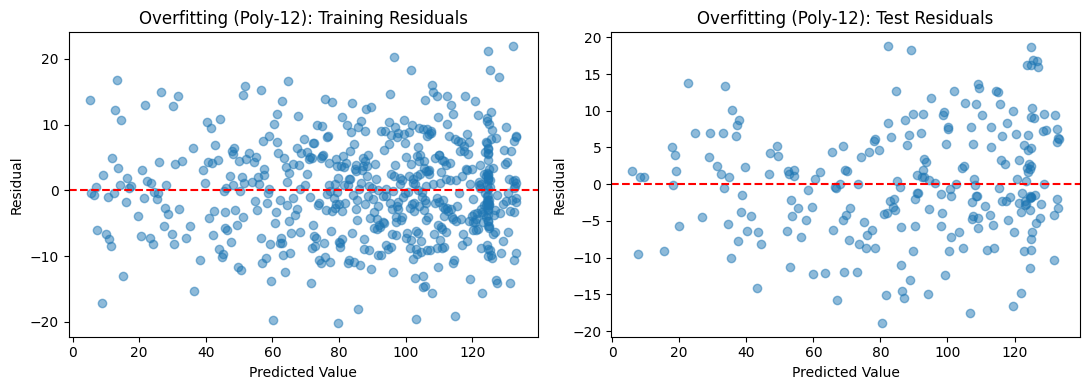

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# 1. Simulate real-life nonlinear data (e.g., fire weather index, insurance claims, etc.)
np.random.seed(101)
X = np.linspace(0, 15, 800)
y = 40 * np.log1p(X) + 0.7 * (X ** 1.3) + np.random.normal(0, 7, 800)
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def plot_residuals_case(model, X_train, y_train, X_test, y_test, title, transformer=None):
    if transformer:
        Xtr = transformer.fit_transform(X_train)
        Xts = transformer.transform(X_test)
    else:
        Xtr = X_train
        Xts = X_test
    model.fit(Xtr, y_train)
    ytr_pred = model.predict(Xtr)
    yts_pred = model.predict(Xts)
    res_tr = y_train - ytr_pred
    res_ts = y_test - yts_pred
    plt.figure(figsize=(11,4))
    plt.subplot(1,2,1)
    plt.scatter(ytr_pred, res_tr, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{title}: Training Residuals')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')
    plt.subplot(1,2,2)
    plt.scatter(yts_pred, res_ts, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'{title}: Test Residuals')
    plt.xlabel('Predicted Value')
    plt.ylabel('Residual')
    plt.tight_layout()
    plt.show()

# 2. Underfitting scenario: Linear model on nonlinear data
plot_residuals_case(LinearRegression(), X_train, y_train, X_test, y_test, 'Underfitting (Linear Model)')

# 3. Good fit: Model complexity matches data (degree 2 polynomial here)
poly2 = PolynomialFeatures(degree=2)
plot_residuals_case(LinearRegression(), X_train, y_train, X_test, y_test, 'Good Fit (Poly-2)', transformer=poly2)

# 4. Overfitting: High-degree polynomial model
poly12 = PolynomialFeatures(degree=12)
plot_residuals_case(LinearRegression(), X_train, y_train, X_test, y_test, 'Overfitting (Poly-12)', transformer=poly12)
